### Evolution of Stellar Kinematics in M33

In this notebook, I am answering the question: how will the velocity dispersion of M33 evolve during the M31-MW merger?

I will plot the evolution of the velociy dispersion over time.

In [10]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
import astropy.table as tbl

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from Readfile import Read
from CenterOfMass import CenterOfMass

In [11]:
#time, total, data = Read("/home/astr400b/VLowRes/M33_000.txt")
path = "/home/astr400b/LowRes/"

class TotalVDisp:
    # Class to compute the velocity and velocity dispersion of an input galaxy
    
    def __init__(self, galaxy, snap_id, ptype=2):
        
        """
        inputs: 
            galaxy: the name of the galaxy, input as string
            snap_id: the timestamp at which velocity is computed,
                     can be input as int or array of int
            ptype: the particle type whose velocity is computed
                    default: 2
                    1 for halo, 2 for stars, 3 for bulge
        """
        
            
        if snap_id < 9.9:
               self.filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_00" + str(snap_id) + ".txt"
        elif snap_id < 99.9:
               self.filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_0" + str(snap_id) + ".txt"
        elif snap_id > 99.9:
              self.filename = "/home/astr400b/VLowRes/%s" %(galaxy) + "_" + str(snap_id) + ".txt"
        # read data in the given file using Read
        self.time, self.total, self.data = Read(self.filename)                                                                                             

        #create an array to store indexes of particles of desired Ptype                                
        self.index = np.where(self.data['type'] == ptype)

        # store the mass, positions, velocities of only the particles of the given type
        # the following only gives the example of storing the mass
        self.m = self.data['m'][self.index]
        # write your own code to complete this for positions and velocities
        self.m = self.data["m"][self.index]
        self.x = self.data["x"][self.index]
        self.y = self.data["y"][self.index]
        self.z = self.data["z"][self.index]
        self.vx = self.data["vx"][self.index]
        self.vy = self.data["vy"][self.index]
        self.vz = self.data["vz"][self.index]
        
        
    def VtoCoM(self):
        """
        function computes velocity of particles relative to their center of mass
        inputs: none, accepts inputs from __init__
        returns: 
            vtot: the total magnitude of the velocity vector
        """
        
        # Create instance of CenterOfMass of oobject
        COMD = CenterOfMass(self.filename,2)
        
        # Compute COM position and velocity using disk particles
        COMP = COMD.COM_P(0.1,4)
        COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])
        
        # Determine positions of particles relative to COM 
        xD = COMD.x - COMP[0] 
        yD = COMD.y - COMP[1]
        zD = COMD.z - COMP[2] 

        # total magnitude of the position vector
        rtot = np.sqrt(xD**2 + yD**2 + zD**2)

        # Determine velocities of particles relative to COM motion
        vxD = COMD.vx - COMV[0]
        vyD = COMD.vy - COMV[1]
        vzD = COMD.vz - COMV[2]

        # total magnitude of velocity vector
        self.vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)
        
        return self.vtot

                    
    def velocity_dispersion(self):
        """
        function computes the velocity dispersion of particles
        inputs: vtot
        returns: the velocity dispersion
        """
        # compute average velocity
        avg_v = np.sum(self.vtot)/(len(self.vtot))
        
        # create array of zeros
        v_disp = np.zeros_like(self.vtot)
        
        # compute (velocity dispersion)**2
        for i in range(len(self.vtot)):
            v_disp[i] = (self.vtot[i]-avg_v)**2
        
        # return velocity dipsersion
        return np.sqrt(np.sum(v_disp)/len(self.vtot))
    

In [12]:
M33_v = np.zeros((160,9300))
M33_disp = np.zeros(160)

snap_ids = np.arange(0,800,5)


for i in range(len(snap_ids)):
    n = snap_ids[i]
    M33_VDispersion = TotalVDisp("M33",n)
    M33_v[i,:] = M33_VDispersion.VtoCoM()
    #M33_vr[i,:] = V_disp("M33",n).velocity_r()
    M33_disp[i] = M33_VDispersion.velocity_dispersion()
   # M33_prof = MassProfile("M33",i)
    


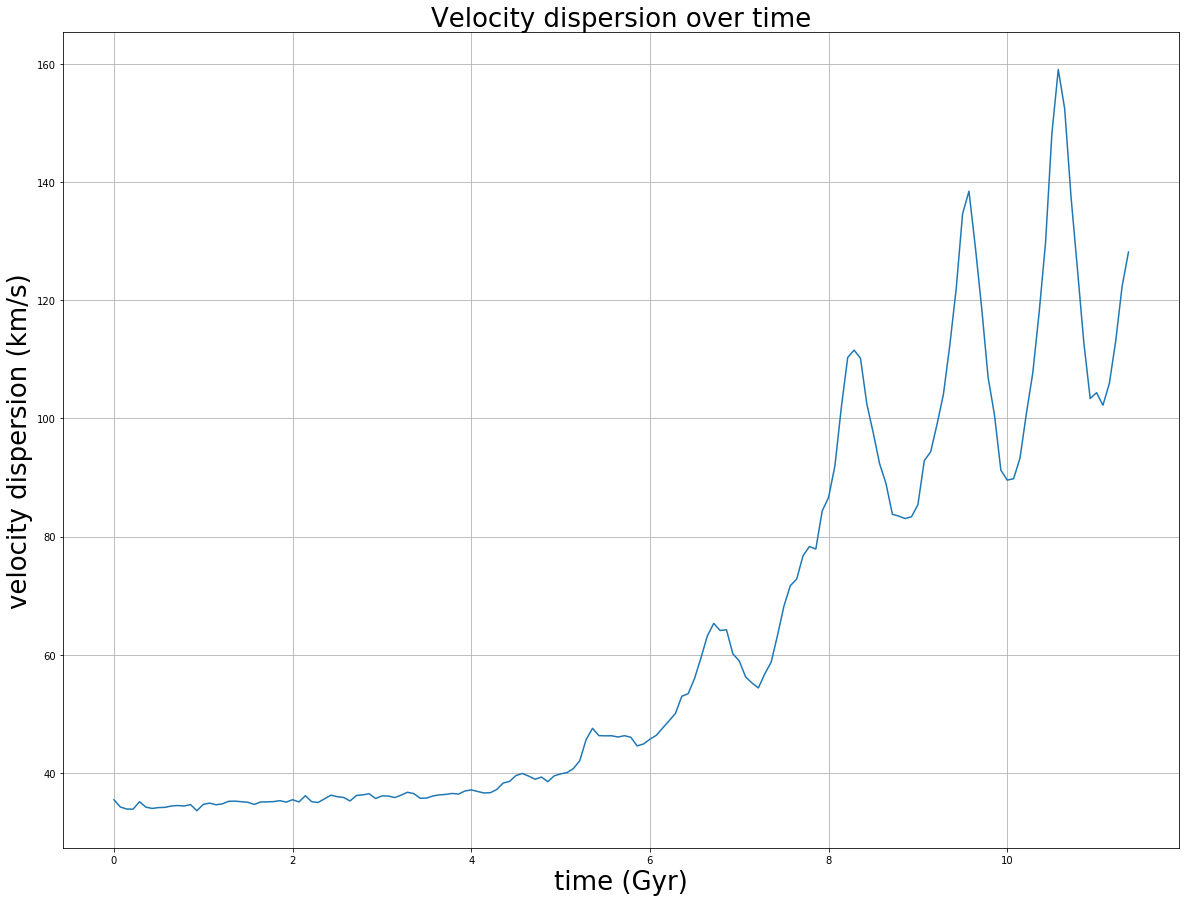

In [13]:
# read in from Orbit_M33.txt from assignment 6 to get the time
M33t, M33x, M33y, M33z, M33vx, M33vy, M33vz = np.genfromtxt("Orbit_M33.txt",delimiter=" ", unpack = True)

# plot the velocity dispersion over time
plt.figure(figsize=(20,15))
plt.title("Velocity dispersion over time",fontsize=26)
plt.ylabel("velocity dispersion (km/s)",fontsize=26)
plt.xlabel("time (Gyr)",fontsize=26)
plt.plot(M33t/10e2,M33_disp)
plt.grid()
plt.show()
